<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/DL/5.1.%20Seq2Seq_(Sequence_to_Sequence).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Seq2Seq (Sequence-to-Sequence)

## Введение

Модель Seq2Seq (Sequence-to-Sequence) — это архитектура, используемая для преобразования последовательностей одной длины в последовательности другой длины. Она особенно популярна в задачах обработки естественного языка (NLP), таких как машинный перевод, текстовое обобщение, диалоговые системы и многое другое. Основная идея Seq2Seq заключается в том, что входная последовательность сначала кодируется в фиксированное скрытое представление, а затем декодируется в выходную последовательность.

## 1. Архитектура Seq2Seq

Модель Seq2Seq состоит из двух основных компонентов:

1. Кодировщик (Encoder) — принимает входную последовательность и преобразует её в скрытое представление.
2. Декодировщик (Decoder) — принимает скрытое представление и генерирует выходную последовательность.

### 1.1 Кодировщик

Кодировщик обычно реализуется как рекуррентная нейронная сеть (RNN) или его вариации (например, LSTM или GRU). Он обрабатывает входную последовательность $\mathbf{x} = (x_1, x_2, \ldots, x_T)$, где $T$ — длина входной последовательности.

На каждом шаге $t$ кодировщик обновляет свое скрытое состояние $\mathbf{h}_t$ следующим образом:

$$
\mathbf{h}_t = \sigma(\mathbf{W}_h \mathbf{h}_{t-1} + \mathbf{W}_x \mathbf{x}_t + \mathbf{b})
$$

где:
- $\mathbf{h}_t$ — скрытое состояние в момент времени $t$,
- $\sigma$ — функция активации (обычно tanh или ReLU),
- $\mathbf{W}_h$ — матрица весов для скрытого состояния,
- $\mathbf{W}_x$ — матрица весов для входных данных,
- $\mathbf{b}$ — вектор смещения.

Скрытое состояние на последнем шаге $T$ будет использовано как контекст (или начальное состояние) для декодировщика:

$$
\mathbf{h}_C = \mathbf{h}_T
$$

### 1.2 Декодировщик

Декодировщик также представляет собой RNN и принимает скрытое состояние кодировщика как свое начальное состояние. Декодировщик генерирует выходные последовательности $\mathbf{y} = (y_1, y_2, \ldots, y_S)$, где $S$ — длина выходной последовательности.

В декодировщике на каждом шаге $t'$ используется следующее уравнение:

$$
\mathbf{h}'_{t'} = \sigma(\mathbf{W}'_h \mathbf{h}'_{t'-1} + \mathbf{W}'_y \mathbf{y}_{t'-1} + \mathbf{W}'_C \mathbf{h}_C + \mathbf{b}')
$$

где:
- $\mathbf{h}'_{t'}$ — скрытое состояние декодировщика в момент времени $t'$,
- $\mathbf{y}_{t'-1}$ — предыдущий выход декодировщика,
- $\mathbf{W}'_h, \mathbf{W}'_y, \mathbf{W}'_C$ — матрицы весов декодировщика,
- $\mathbf{b}'$ — вектор смещения декодировщика.

### Генерация выходов

Выход декодировщика на шаге $t'$ можно получить с помощью софтмакс-функции:

$$
\mathbf{\hat{y}}_{t'} = \text{softmax}(\mathbf{W}'_o \mathbf{h}'_{t'} + \mathbf{b}'_o)
$$

где:
- $\mathbf{W}'_o$ — матрица весов для выходов,
- $\mathbf{b}'_o$ — вектор смещения для выходов,
- $\hat{y}_{t'}$ — предсказанные вероятности классов для выхода на шаге $t'$.

## 2. Обучение модели Seq2Seq

### 2.1 Функция потерь

Обучение модели Seq2Seq включает в себя минимизацию функции потерь. Для задач классификации обычно используется кросс-энтропия:

$$
L = -\frac{1}{S} \sum_{t'=1}^{S} \sum_{c=1}^{C} y_{t',c} \log(\hat{y}_{t',c})
$$

где:
- $y_{t',c}$ — истинная метка для класса $c$ в момент времени $t'$,
- $\hat{y}_{t',c}$ — предсказанная вероятность класса $c$ на выходе декодировщика.

### 2.2 Оптимизация

Для оптимизации весов и смещений Seq2Seq модели используется метод градиентного спуска или его варианты, такие как Adam. Обновление весов происходит по следующей формуле:

$$
\mathbf{W} \leftarrow \mathbf{W} - \eta \nabla_{\mathbf{W}} L
$$

где $\eta$ — скорость обучения, а $\nabla_{\mathbf{W}} L$ — градиент функции потерь по весам.

### 2.3 Обратное распространение ошибки

Обратное распространение в модели Seq2Seq включает передачу ошибок от декодировщика к кодировщику через скрытые состояния. Используется алгоритм Backpropagation Through Time (BPTT).

#### 2.3.1 Градиенты декодировщика

Сначала вычисляются градиенты выходов декодировщика:

$$
\frac{\partial L}{\partial \hat{y}_{t'}} = \hat{y}_{t'} - y_{t'}
$$

Затем, используя цепное правило, находят градиенты по скрытым состояниям декодировщика:

$$
\frac{\partial L}{\partial \mathbf{h}'_{t'}} = \frac{\partial L}{\partial \hat{y}_{t'}} \cdot \frac{\partial \hat{y}_{t'}}{\partial \mathbf{h}'_{t'}}
$$

где:
$$
\frac{\partial \hat{y}_{t'}}{\partial \mathbf{h}'_{t'}} = \mathbf{W}'_o \cdot \text{softmax}'(\mathbf{h}'_{t'})
$$

#### 2.3.2 Градиенты кодировщика

Затем градиенты передаются обратно к кодировщику:

$$
\frac{\partial L}{\partial \mathbf{h}_{t}} = \sum_{t' \geq t} \frac{\partial L}{\partial \mathbf{h}'_{t'}} \cdot \frac{\partial \mathbf{h}'_{t'}}{\partial \mathbf{h}_{t}}
$$

## 3. Вариации Seq2Seq

### 3.1 Внимание (Attention)

Модели Seq2Seq могут быть улучшены с использованием механизма внимания, который позволяет декодировщику обращать внимание на разные части входной последовательности в зависимости от текущего состояния.

При использовании механизма внимания декодировщик генерирует контекстный вектор $\mathbf{c}_{t'}$ на каждом шаге $t'$:

$$
\mathbf{c}_{t'} = \sum_{t=1}^{T} \alpha_{t',t} \mathbf{h}_t
$$

где $\alpha_{t',t}$ — веса внимания, рассчитываемые с помощью:

$$
\alpha_{t',t} = \frac{\exp(e_{t',t})}{\sum_{k=1}^{T} \exp(e_{t',k})}
$$
где $e_{t',t}$ — мера совместимости (например, скалярное произведение) между скрытыми состояниями:

$$
e_{t',t} = \mathbf{v}^T \cdot \tanh(\mathbf{W}_{a} \mathbf{h}_{t} + \mathbf{W}'_{a} \mathbf{h}'_{t'})
$$

где $\mathbf{v}$ и $\mathbf{W}_{a}, \mathbf{W}'_{a}$ — параметры модели.

Теперь скрытое состояние декодировщика будет обновлено с использованием контекстного вектора:

$$
\mathbf{h}'_{t'} = \sigma(\mathbf{W}'_h \mathbf{h}'_{t'-1} + \mathbf{W}'_y \mathbf{y}_{t'-1} + \mathbf{W}'_C \mathbf{h}_C + \mathbf{W}_c \mathbf{c}_{t'} + \mathbf{b}')
$$

### 3.2 Transformer

Совсем недавно архитектура Transformer была предложена как замена Seq2Seq, основанная на механиз

ме внимания, без использования рекуррентных нейронных сетей. Она позволяет значительно ускорить обучение и увеличивает производительность на задачах, связанных с последовательными данными.



Рассмотрим конкретный числовой пример с использованием архитектуры Seq2Seq. Мы будем использовать простые последовательности для демонстрации работы кодировщика и декодировщика. В качестве задачи возьмем преобразование последовательности входных чисел в выходные числа.

### Задача

Предположим, у нас есть входная последовательность $\mathbf{x} = (1, 2, 3)$ и мы хотим, чтобы модель Seq2Seq преобразовала её в выходную последовательность $\mathbf{y} = (4, 5, 6)$.

### Архитектура

Для простоты мы будем использовать следующее:

- Кодировщик и декодировщик будут состоять из одного скрытого состояния (RNN).
- Мы будем использовать линейную активацию для кодировщика и декодировщика.
- Параметры модели (веса и смещения) будут заданы заранее.

### Шаг 1: Определение параметров модели

#### 1.1 Кодировщик

Параметры кодировщика:
- Матрица весов $\mathbf{W}_h$ для скрытого состояния:
$$
  \mathbf{W}_h = \begin{pmatrix} 1 \end{pmatrix}
$$
- Матрица весов $\mathbf{W}_x$ для входа:
$$
  \mathbf{W}_x = \begin{pmatrix} 1 \end{pmatrix}
$$
- Вектор смещения $\mathbf{b}$:
$$
  \mathbf{b} = 0
$$

#### 1.2 Декодировщик

Параметры декодировщика:
- Матрица весов $\mathbf{W}'_h$:
$$
  \mathbf{W}'_h = \begin{pmatrix} 1 \end{pmatrix}
$$
- Матрица весов $\mathbf{W}'_y$:
$$
  \mathbf{W}'_y = \begin{pmatrix} 1 \end{pmatrix}
$$
- Вектор смещения $\mathbf{b}'$:
$$
  \mathbf{b}' = 0
$$

### Шаг 2: Прямое распространение (Forward Pass)

#### 2.1 Кодирование

Мы начинаем с кодирования входной последовательности $\mathbf{x} = (1, 2, 3)$.

- На первом шаге $t=1$:
$$
  \mathbf{h}_1 = \sigma(\mathbf{W}_h \cdot 0 + \mathbf{W}_x \cdot x_1 + \mathbf{b}) = \sigma(1 \cdot 1 + 0) = 1
$$

- На втором шаге $t=2$:
$$
  \mathbf{h}_2 = \sigma(\mathbf{W}_h \cdot \mathbf{h}_1 + \mathbf{W}_x \cdot x_2 + \mathbf{b}) = \sigma(1 \cdot 1 + 1 \cdot 2 + 0) = \sigma(3) = 3
$$

- На третьем шаге $t=3$:
$$
  \mathbf{h}_3 = \sigma(\mathbf{W}_h \cdot \mathbf{h}_2 + \mathbf{W}_x \cdot x_3 + \mathbf{b}) = \sigma(1 \cdot 3 + 1 \cdot 3 + 0) = \sigma(6) = 6
$$

Таким образом, последнее скрытое состояние кодировщика будет:
$$
\mathbf{h}_C = \mathbf{h}_3 = 6
$$

#### 2.2 Декодирование

Теперь мы будем использовать декодировщик, чтобы получить выходные значения $\mathbf{y}$.

- Начнем с первого выходного значения $t' = 1$. Входное значение для декодировщика — это скрытое состояние кодировщика:
$$
  \mathbf{y}_0 = \mathbf{h}_C = 6
$$
  
- На первом шаге $t' = 1$:
$$
  \mathbf{h}'_{1} = \sigma(\mathbf{W}'_h \cdot 0 + \mathbf{W}'_y \cdot \mathbf{y}_0 + \mathbf{b}') = \sigma(1 \cdot 6 + 0) = 6
$$
  Предсказанное значение:
$$
  \hat{y}_{1} = \mathbf{h}'_{1} = 6
$$

- На втором шаге $t' = 2$:
$$
  \mathbf{h}'_{2} = \sigma(\mathbf{W}'_h \cdot \mathbf{h}'_{1} + \mathbf{W}'_y \cdot \hat{y}_{1} + \mathbf{b}') = \sigma(1 \cdot 6 + 1 \cdot 6 + 0) = \sigma(12) = 12
$$
  Предсказанное значение:
$$
  \hat{y}_{2} = \mathbf{h}'_{2} = 12
$$

- На третьем шаге $t' = 3$:
$$
  \mathbf{h}'_{3} = \sigma(\mathbf{W}'_h \cdot \mathbf{h}'_{2} + \mathbf{W}'_y \cdot \hat{y}_{2} + \mathbf{b}') = \sigma(1 \cdot 12 + 1 \cdot 12 + 0) = \sigma(24) = 24
$$
  Предсказанное значение:
$$
  \hat{y}_{3} = \mathbf{h}'_{3} = 24
$$

Таким образом, выходная последовательность будет:
$$
\mathbf{\hat{y}} = (6, 12, 24)
$$

### Шаг 3: Функция потерь

Теперь вычислим функцию потерь. Для этого используем среднеквадратичную ошибку (MSE):

$$
L = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Где:
- $y = (4, 5, 6)$
- $\hat{y} = (6, 12, 24)$

Сначала находим ошибки для каждого элемента:

- Для первого элемента:
$$
  (4 - 6)^2 = 4
$$

- Для второго элемента:
$$
  (5 - 12)^2 = 49
$$

- Для третьего элемента:
$$
  (6 - 24)^2 = 324
$$

Теперь можем найти среднее значение:
$$
L = \frac{1}{3} (4 + 49 + 324) = \frac{377}{3} \approx 125.67
$$

### Шаг 4: Обратное распространение

Теперь мы будем выполнять обратное распространение, чтобы обновить параметры модели. Для простоты мы сосредоточимся на градиенте функции потерь по выходам.

#### 4.1 Градиенты выходов декодировщика

Сначала вычисляем градиенты по выходам декодировщика:

$$
\frac{\partial L}{\partial \hat{y}_i} = \frac{2}{n} (\hat{y}_i - y_i)
$$

- Для первого выхода:
$$
  \frac{\partial L}{\partial \hat{y}_1} = \frac{2}{3} (6 - 4) = \frac{2}{3} \cdot 2 = \frac{4}{3}
$$

- Для второго выхода:
$$
  \frac{\partial L}{\partial \hat{y}_2} = \frac{2}{3} (12 - 5) = \frac{2}{3} \cdot 7 = \frac{14}{3}
$$

- Для третьего выхода:
$$
  \frac{\partial L}{\partial \hat{y}_3} = \frac{2}{3} (24 - 6) = \frac{2}{3} \cdot 18 = 12
$$

#### 4.2 Градиенты по весам декодировщика

Теперь находим градиенты по весам декодировщика. Используем градиенты по выходам для обновления весов:

$$
\frac{\partial L}{\partial W'_y} = \sum_{i=1}^{n} \frac{\partial L}{\partial \hat{y}_i} \cdot \mathbf{y}_{t'-1}
$$

Обновляем веса декодировщика с использованием градиентов:

- Для $\mathbf{W}'_y$:
$$
  \frac{\partial L}{\partial W'_y} = \frac{\partial L}{\partial \hat{y}_1} \cdot y_0 + \frac{\partial L}{\partial \hat{y}_2} \cdot \hat{y}_1 + \frac{\partial L}{\partial \hat{y}_3} \cdot \hat{y}_2
$$

Теперь подставим значения:
$$
\frac{\partial L}{\partial W'_y} = \frac{4}{3} \cdot 6 + \frac{14}{3} \cdot 6 + 12 \cdot 12
$$
$$
= \frac{24}{3} + \frac{84}{3} + 144 = 8 + 28 + 144 = 180
$$

Таким образором, мы рассмотрели полный цикл работы модели Seq2Seq, начиная от кодирования входных последовательностей до декодирования выходных последовательностей, а также вычисления функции потерь и градиентов для обратного распространения. В этом примере использовались простые числовые значения и линейные функции активации для упрощения вычислений. На практике модели Seq2Seq используют более сложные структуры, такие как LSTM или GRU, а также механизмы внимания, чтобы улучшить производительность на реальных задачах.

##Реализация на Питон
Давайте реализуем модель Seq2Seq на Python, используя библиотеку PyTorch для построения нейронной сети. Мы создадим простую модель Seq2Seq, которая будет принимать последовательность чисел, а затем преобразовывать ее в другую последовательность. В качестве визуализации используем Matplotlib для отображения результатов.



Epoch [100/1000], Loss: 8.8418
Epoch [200/1000], Loss: 2.6840
Epoch [300/1000], Loss: 1.0199
Epoch [400/1000], Loss: 0.7007
Epoch [500/1000], Loss: 0.3390
Epoch [600/1000], Loss: 0.1946
Epoch [700/1000], Loss: 0.1688
Epoch [800/1000], Loss: 0.1598
Epoch [900/1000], Loss: 0.1337
Epoch [1000/1000], Loss: 0.1207


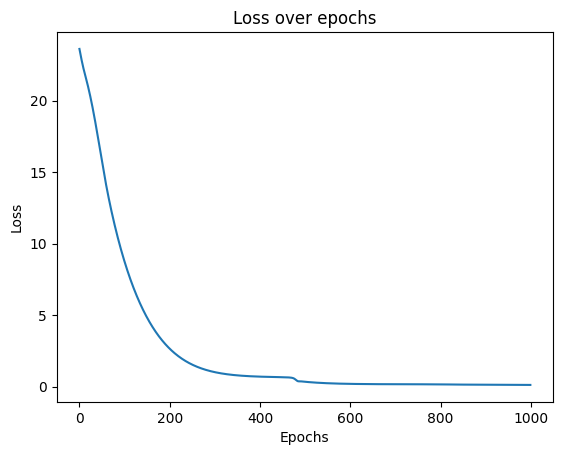

Predicted: [3.9282079 5.370972  5.5319147]
Actual: [4. 5. 6.]


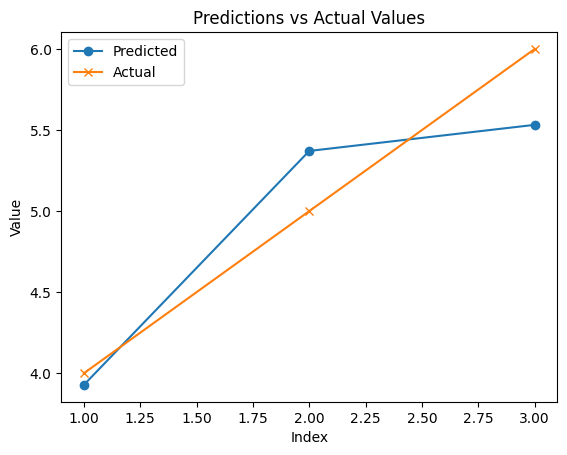

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Установим фиксированное значение для воспроизводимости
torch.manual_seed(0)

# Параметры модели
input_size = 1  # Размер входных данных
hidden_size = 1  # Размер скрытого состояния
output_size = 1  # Размер выходных данных
num_epochs = 1000  # Количество эпох
learning_rate = 0.01  # Скорость обучения

# Определение класса Кодировщика
class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Encoder, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size)

    def forward(self, x):
        # Вход x имеет размер (sequence_length, batch_size, input_size)
        output, hidden = self.rnn(x.view(len(x), 1, -1))  # Приводим x к нужной форме
        return hidden

# Определение класса Декодировщика
class Decoder(nn.Module):
    def __init__(self, hidden_size, output_size):
        super(Decoder, self).__init__()
        self.rnn = nn.RNN(hidden_size, hidden_size)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.rnn(x.view(1, 1, -1), hidden)  # Приводим x к нужной форме
        output = self.fc(output[0])  # Применяем линейный слой
        return output, hidden

# Определение класса Seq2Seq
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x, target_length):
        hidden = self.encoder(x)
        decoder_input = torch.zeros(1, 1, input_size)  # Начальное состояние декодировщика
        outputs = []
        for _ in range(target_length):
            output, hidden = self.decoder(decoder_input, hidden)
            outputs.append(output)
            decoder_input = output.view(1, -1, 1)  # Используем выход как следующий вход
        return torch.cat(outputs, dim=0)

# Создание данных
def create_data():
    # Входная последовательность (1, 2, 3) -> Выходная последовательность (4, 5, 6)
    x = torch.tensor([1.0, 2.0, 3.0])
    y = torch.tensor([4.0, 5.0, 6.0])
    return x, y

# Подготовка данных
x, y = create_data()

# Инициализация моделей
encoder = Encoder(input_size, hidden_size)
decoder = Decoder(hidden_size, output_size)
model = Seq2Seq(encoder, decoder)

# Оптимизатор и функция потерь
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

# Обучение модели
losses = []
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()

    output = model(x, target_length=len(y))
    loss = criterion(output.view(-1), y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

# Визуализация потерь
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss over epochs')
plt.show()

# Проверка предсказаний
model.eval()
with torch.no_grad():
    predicted = model(x, target_length=len(y)).view(-1).numpy()
    print(f'Predicted: {predicted}')
    print(f'Actual: {y.numpy()}')

# Визуализация предсказаний
plt.plot(range(1, len(predicted) + 1), predicted, label='Predicted', marker='o')
plt.plot(range(1, len(y) + 1), y.numpy(), label='Actual', marker='x')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


## Заключение

Seq2Seq модели играют важную роль в современных приложениях машинного обучения, особенно в обработке естественного языка. Понимание их архитектуры, обучения и вариаций, таких как внимание и Transformer, является необходимым шагом для разработки эффективных систем для работы с последовательностями.


### Вопросы для самопроверки

1. Что такое модель Seq2Seq и для каких задач она применяется?
2. Опишите архитектуру Seq2Seq модели. Какие компоненты она включает?
3. Какие типы рекуррентных нейронных сетей (RNN) могут использоваться в Seq2Seq моделях?
4. Что представляет собой скрытое состояние (hidden state) в кодировщике и декодировщике?
5. Как кодировщик обрабатывает входную последовательность в модели Seq2Seq?
6. Как декодировщик генерирует выходную последовательность в модели Seq2Seq?
7. Зачем используется механизм внимания (Attention) в модели Seq2Seq?
8. Чем отличаются унидирекционные и двунаправленные RNN (unidirectional and bidirectional RNN) в контексте Seq2Seq?
9. Какие проблемы возникают при использовании Seq2Seq модели на длинных последовательностях?
10. Как происходит обучение модели Seq2Seq? Опишите процесс обновления параметров.
11. Что такое teacher forcing и как он используется в обучении Seq2Seq?
12. Какова роль функции потерь в Seq2Seq и какие типы потерь могут использоваться?
13. Какое влияние на модель Seq2Seq оказывают гиперпараметры, такие как размер скрытого слоя и длина последовательности?
14. В чем заключается основное отличие Seq2Seq от модели Transformer?
15. Как реализовать Seq2Seq модель для задачи машинного перевода? Какие данные необходимы?



### Задачи для самостоятельной работы

Задачи для понимания основ Seq2Seq

1. Рассчитайте выходные значения кодировщика Seq2Seq для входной последовательности $x = (3, 4, 5)$, если веса и смещения заданы как: $\mathbf{W}_h = 1$, $\mathbf{W}_x = 1$, $\mathbf{b} = 0$. Введите формулы и вычисления.
2. Для последовательности $y = (7, 8, 9)$ рассчитайте выходы декодировщика при тех же параметрах: $\mathbf{W}'_h = 1$, $\mathbf{W}'_y = 1$, $\mathbf{b}' = 0$.
3. Вычислите функцию потерь для входных данных $x = (1, 2)$ и предсказанных выходных данных $\hat{y} = (5, 6)$ с использованием MSE.
4. Создайте уравнение для градиентов функции потерь по весам кодировщика в модели Seq2Seq.
5. Постройте уравнение обратного распространения ошибки для декодировщика.
6. Найдите скрытые состояния кодировщика для последовательности $x = (2, 4, 6)$ с использованием двунаправленной RNN.
7. Объясните, как изменится модель Seq2Seq, если использовать LSTM вместо обычной RNN.
8. Рассчитайте и визуализируйте скрытые состояния для последовательности $x = (3, 1, 2)$ в Seq2Seq модели.
9. Объясните, как добавление слоя внимания изменяет процесс декодирования в Seq2Seq модели.
10. Опишите пошагово процесс декодирования в Seq2Seq модели, если длина входной последовательности больше длины выходной.

Задачи для практического применения Seq2Seq (11–20):

11. Реализуйте Seq2Seq модель для перевода последовательности $x = (10, 20, 30)$ в последовательность $y = (40, 50, 60)$. Опишите все шаги.
12. Рассчитайте влияние изменения размера скрытого состояния с 1 на 2 для модели Seq2Seq на входе $x = (2, 3, 4)$.
13. Сравните точность модели Seq2Seq на последовательностях разной длины. Для последовательностей $x_1 = (1, 2)$, $x_2 = (1, 2, 3, 4)$, найдите среднее значение функции потерь.
14. Постройте математическую модель Seq2Seq для автоматической генерации текста по заданным входным данным.
15. Рассчитайте скорость сходимости модели Seq2Seq с параметрами $learning\_rate = 0.1$ и $learning\_rate = 0.01$.
16. Постройте график зависимости ошибки (MSE) от количества эпох для Seq2Seq модели с последовательностью длиной 4.
17. Проверьте, как изменится работа Seq2Seq модели, если заменить функцию активации на ReLU.
18. Опишите математически процесс teacher forcing в Seq2Seq модели и рассчитайте вероятность правильного предсказания для выходной последовательности $y = (3, 4, 5)$.
19. Реализуйте пошагово процесс декодирования для Seq2Seq модели с использованием механизма внимания.
20. Оцените влияние параметра dropout на точность модели Seq2Seq для задачи предсказания следующего слова в предложении.

Задачи для расширенного анализа (21–30):

21. Для Seq2Seq модели, обученной на данных о временных рядах, рассчитайте предсказанные значения для новых данных и сравните их с реальными.
22. Сформулируйте уравнения для вычисления внимания (attention weights) в модели Seq2Seq для последовательности $x = (5, 6, 7)$.
23. Реализуйте вычисление градиентов для механизма внимания в модели Seq2Seq с линейной функцией активации.
24. Для двунаправленной Seq2Seq модели найдите скрытые состояния для последовательности $x = (2, 4, 6)$ и постройте график их изменения.
25. Проведите сравнительный анализ Seq2Seq модели и модели Transformer на простой задаче перевода последовательности $x = (1, 2, 3, 4)$.
26. Реализуйте Seq2Seq модель для генерации текста и проверьте её работу на задаче предсказания символов для строки длиной 6.
27. Исследуйте, как изменяются предсказания Seq2Seq модели при добавлении шума в входную последовательность.
28. Рассчитайте и сравните функции потерь для модели Seq2Seq на нескольких задачах, таких как перевод текста и генерация временных рядов.
29. Проведите математический анализ Seq2Seq модели при различной длине входных и выходных последовательностей.
30. Реализуйте Seq2Seq модель для задачи машинного перевода с двуязычными данными и проанализируйте её точность.

